<a href="https://colab.research.google.com/github/UmangSonika/SDE/blob/main/Notebook_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
new_apps = pd.read_csv("apps.csv")
apps = new_apps.drop_duplicates()
print('No. of apps present in dataset: ', len(apps))
apps.sample(5)

No. of apps present in dataset:  9659


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8702,9852,News by The Times of India Newspaper - Latest ...,NEWS_AND_MAGAZINES,4.2,522205,NaN,"10,000,000+",Free,0,Everyone,News & Magazines,"August 7, 2018",Varies with device,Varies with device
5702,6733,BS Films,FAMILY,NaN,1,24.0,100+,Free,0,Everyone,Entertainment,"December 12, 2017",2.0.0,4.3 and up
5135,6131,BG Monitor Diabetes,MEDICAL,4.4,643,2.8,"10,000+",Free,0,Everyone,Medical,"April 23, 2017",8.0.1,4.4 and up
8419,9546,El Nuevo Día,NEWS_AND_MAGAZINES,4.1,8011,13.0,"500,000+",Free,0,Everyone 10+,News & Magazines,"June 13, 2018",4.11.2,4.1 and up
1966,2491,IHSS Help,MEDICAL,4.7,10,4.3,"1,000+",Free,0,Everyone,Medical,"June 5, 2018",1,5.0 and up


In [3]:
charaacters = ['+', '$', ',' ]
lst = ['Installs', 'Price']

for i in lst:
    for char in charaacters :
        apps[i] = apps[i].astype(str).str.replace(char, '')
    apps[i] = pd.to_numeric(apps[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [4]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [5]:
categories_length = len(apps['Category'].unique())
print('No. of categories present: ', categories_length)

app_present = apps['Category'].value_counts().sort_values(ascending = False)
data = [go.Bar(x = app_present.index, y = app_present.values,)]

No. of categories present:  33


In [6]:
final_ratings = apps['Rating'].mean()
print('Average rating of the app: ',final_ratings)

data = [go.Histogram(x = apps['Rating'])]
lyt = {'shapes': [{'type' :'line','x0': final_ratings,'y0': 0,'x1': final_ratings,'y1': 1000,'line': { 'dash': 'dashdot'}}]}

Average rating of the app:  4.173243045387998


In [7]:
%matplotlib inline
import seaborn as sns
import warnings

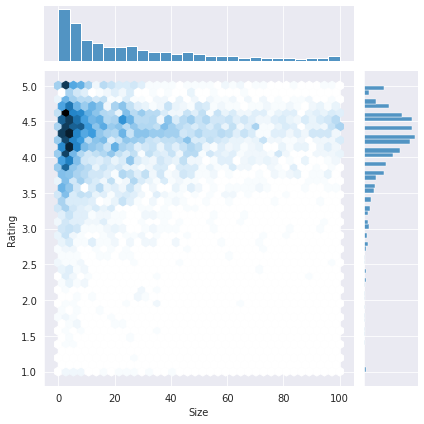

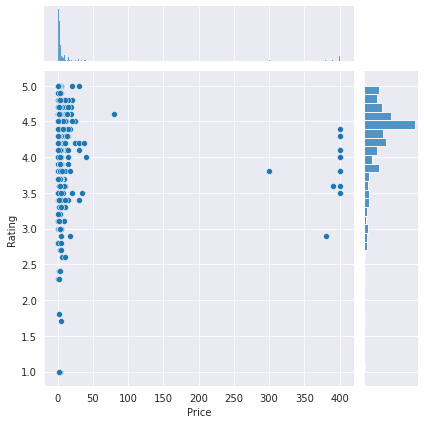

In [8]:
sns.set_style("darkgrid")
warnings.filterwarnings("ignore")
apps_final = apps[(~apps['Rating'].isnull()) & (~apps['Size'].isnull())]
category_lg = apps_final.groupby(['Category']).filter(lambda x: len(x) >= 250).reset_index()
plt = sns.jointplot(x = category_lg['Size'], y = category_lg['Rating'], kind = 'hex')
appsthatarenotfree = apps_final[apps_final['Type'] == 'Paid']
plt2 = sns.jointplot(x = appsthatarenotfree['Price'], y = appsthatarenotfree['Rating'])

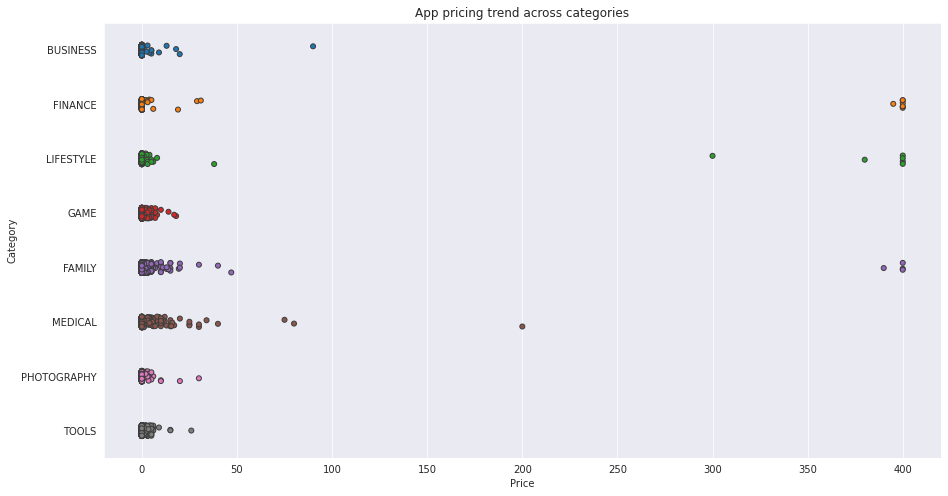

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

category_popular = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY','MEDICAL', 'TOOLS', 'FINANCE','LIFESTYLE','BUSINESS'])]
ax = sns.stripplot(x = category_popular['Price'], y = category_popular['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')
new_apps_founded = category_popular[['Category', 'App', 'Price']][category_popular['Price'] > 200]

Text(0.5, 1.0, 'Trend of the app pricing across the different categories')

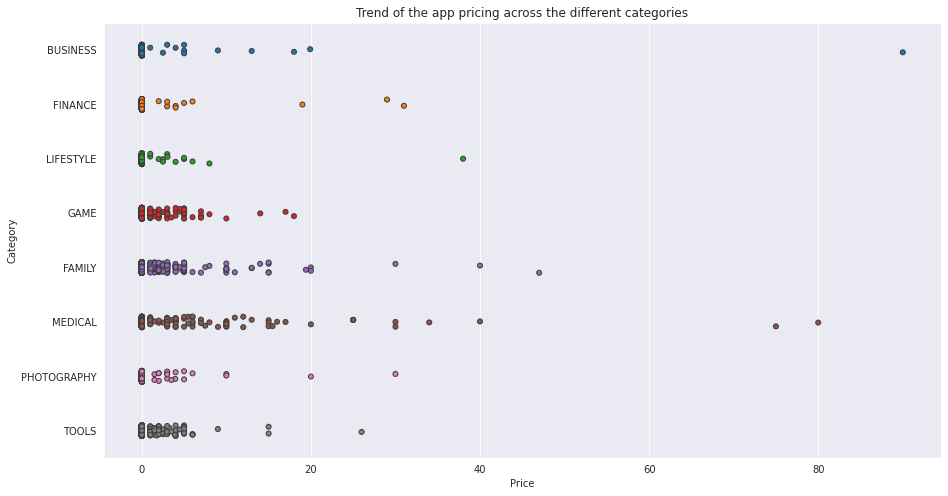

In [10]:
apps_pricelessthan_100 = category_popular[category_popular['Price'] < 100]
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax = sns.stripplot(x='Price', y='Category', data=apps_pricelessthan_100, jitter=True, linewidth=1)
ax.set_title('Trend of the app pricing across the different categories')

Text(0.5, 1.0, 'Distribution of the sentiment polaity')

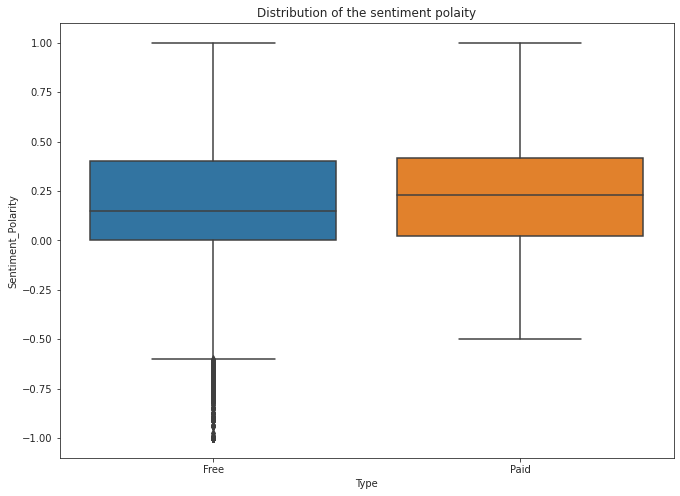

In [11]:
df_final = pd.read_csv("user_reviews.csv")
df_final2 = pd.merge(apps, df_final, on ="App", how = "inner")

df_final2 = df_final2.dropna(subset=['Sentiment', 'Translated_Review'])
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = df_final2)
ax.set_title('Distribution of the sentiment polaity')